In [1]:
x = [10, 20, 30, 40, 50]
for item in x:
    print ('Item is', item)

Item is 10
Item is 20
Item is 30
Item is 40
Item is 50


In [2]:
import IPython
print ('IPython version:      %6.6s (need at least 1.0)', IPython.__version__)



IPython version:      %6.6s (need at least 1.0) 7.5.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)  #array of 30 points from 0 to 10
y = np.sin(x)
z = y + np.random.normal(size=30) * .2
plt.plot(x, y, 'ro-', label='A sine wave')
plt.plot(x, z, 'b-', label='Noisy sine')
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")

Text(0, 0.5, 'Y axis')

In [4]:
print('Make a 3 row x 4 column array of random numbers')
x = np.random.random((3, 4))
print(x)

Make a 3 row x 4 column array of random numbers
[[0.6802935  0.84029772 0.72310817 0.76595417]
 [0.14685808 0.24799312 0.49391602 0.48032829]
 [0.94490364 0.50509115 0.46734943 0.8182091 ]]


In [5]:
# The colon syntax is called "slicing" the array. 
print('Get the first row')
print(x[0,:])


Get the first row
[0.6802935  0.84029772 0.72310817 0.76595417]


In [6]:
x.max()

0.9449036380502158

In [7]:
x.min()

0.1468580840603

In [8]:
x.mean()

0.5928585313115596

In [9]:
print(x.max(axis=1))

[0.84029772 0.49391602 0.94490364]


In [10]:
heads=[]

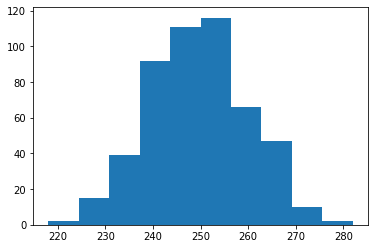

In [11]:
for i in range (500):
    heads.append(np.random.binomial(500,0.5))
hist = plt.hist(heads)

In [12]:
"""
Function
--------
simulate_prizedoor

Generate a random array of 0s, 1s, and 2s, representing
hiding a prize between door 0, door 1, and door 2

Parameters
----------
nsim : int
    The number of simulations to run

Returns
-------
sims : array
    Random array of 0s, 1s, and 2s

Example
-------
>>> print simulate_prizedoor(3)
array([0, 0, 2])
"""

'\nFunction\n--------\nsimulate_prizedoor\n\nGenerate a random array of 0s, 1s, and 2s, representing\nhiding a prize between door 0, door 1, and door 2\n\nParameters\n----------\nnsim : int\n    The number of simulations to run\n\nReturns\n-------\nsims : array\n    Random array of 0s, 1s, and 2s\n\nExample\n-------\n>>> print simulate_prizedoor(3)\narray([0, 0, 2])\n'

In [13]:
def simulate_prizedoor(nsim):
    return np.random.randint(0,3,size=nsim)

In [14]:
simulate_prizedoor(3)

array([1, 2, 1])

In [17]:
'''
Function
--------
simulate_guess

Return any strategy for guessing which door a prize is behind. This
could be a random strategy, one that always guesses 2, whatever.

Parameters
----------
nsim : int
    The number of simulations to generate guesses for

Returns
-------
guesses : array
    An array of guesses. Each guess is a 0, 1, or 2

Example
-------
>>> print simulate_guess(5)
array([0, 0, 0, 0, 0]'''

'\nFunction\n--------\nsimulate_guess\n\nReturn any strategy for guessing which door a prize is behind. This\ncould be a random strategy, one that always guesses 2, whatever.\n\nParameters\n----------\nnsim : int\n    The number of simulations to generate guesses for\n\nReturns\n-------\nguesses : array\n    An array of guesses. Each guess is a 0, 1, or 2\n\nExample\n-------\n>>> print simulate_guess(5)\narray([0, 0, 0, 0, 0]'

In [18]:
def simulate_guess(nsim):
    return np.zeros(nsim)

In [19]:
"""
Function
--------
goat_door

Simulate the opening of a "goat door" that doesn't contain the prize,
and is different from the contestants guess

Parameters
----------
prizedoors : array
    The door that the prize is behind in each simulation
guesses : array
    THe door that the contestant guessed in each simulation

Returns
-------
goats : array
    The goat door that is opened for each simulation. Each item is 0, 1, or 2, and is different
    from both prizedoors and guesses

Examples
--------
>>> print goat_door(np.array([0, 1, 2]), np.array([1, 1, 1]))
>>> array([2, 2, 0])"""

'\nFunction\n--------\ngoat_door\n\nSimulate the opening of a "goat door" that doesn\'t contain the prize,\nand is different from the contestants guess\n\nParameters\n----------\nprizedoors : array\n    The door that the prize is behind in each simulation\nguesses : array\n    THe door that the contestant guessed in each simulation\n\nReturns\n-------\ngoats : array\n    The goat door that is opened for each simulation. Each item is 0, 1, or 2, and is different\n    from both prizedoors and guesses\n\nExamples\n--------\n>>> print goat_door(np.array([0, 1, 2]), np.array([1, 1, 1]))\n>>> array([2, 2, 0])'

In [26]:
def goat_door(prizedoors, guesses):
    ret_val = np.random.randint(low=0,high=3,size=prizedoors.size)
    while 1: 
        holder = (ret_val!= prizedoors) | (ret_val != guesses)
        if holder.any():
            return ret_val
        ret_val[holder] = np.random.randint(0,3,size=holder.sum())

In [39]:
"""
Function
--------
switch_guess

The strategy that always switches a guess after the goat door is opened

Parameters
----------
guesses : array
     Array of original guesses, for each simulation
goatdoors : array
     Array of revealed goat doors for each simulation

Returns
-------
The new door after switching. Should be different from both guesses and goatdoors

Examples
--------
>>> print switch_guess(np.array([0, 1, 2]), np.array([1, 2, 1]))
>>> array([2, 0, 0])
"""
def switch_guess(guesses, goatdoors):
    some_value = np.random.randint(0,3,goatdoors.size)
    while 1:
        holder = (some_value != goatdoors) & (some_value != guesses)
        if holder.any():
            return some_value 


In [40]:
"""
Function
--------
win_percentage

Calculate the percent of times that a simulation of guesses is correct

Parameters
-----------
guesses : array
    Guesses for each simulation
prizedoors : array
    Location of prize for each simulation

Returns
--------
percentage : number between 0 and 100
    The win percentage

Examples
---------
>>> print win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))
33.333
"""
def win_percentage(guesses, prizedoors):
    return 100 * (guesses == prizedoors).mean()

In [41]:
nsim = 10000

#keep guesses
print ('Win percentage when keeping original door')
print (win_percentage(simulate_prizedoor(nsim), simulate_guess(nsim)))

#switch
pd = simulate_prizedoor(nsim)
guess = simulate_guess(nsim)
goats = goat_door(pd, guess)
guess = switch_guess(guess, goats)
print ('Win percentage when switching doors')
print (win_percentage(pd, guess).mean())

Win percentage when keeping original door
33.62
Win percentage when switching doors
33.239999999999995
